# Optimization

Finding maxima and minima of a function $f(x)$.


## Motivation

Many problems in engineering involve optimization. There will be often a set of constraints and an objective, and the engineer wil need to achieve optimally the objective (maximize speed, effectiveness, minimize cost) within the constraints. We will learn here how to combine those.

# One-dimensional unconstrained optimization

## Newton's method

Basically, finding the zeros of $f'(x)$ through Newton-Rhapson. Therefore, we need to be able to calculate $f''(x)$.

### Example

Use Newton’s method to find the
maximum of

$$f(x) = 2 sin(x) − \frac{x^2}{2} $$

Use

$$x_0 = 2.5$$

We will need $f'(x)$ and $f''(x)$. Luckily, these ones are easy:

$$f'(x) = 2cos(x) - x$$

$$f''(x) = -2sin(x) - 1$$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return 2 * np.sin(x) - (x ** 2) / 2

def f_prime(x):
    return 2 * np.cos(x) - x

def f_primeprime(x):
    return -2 * np.sin(x) - 1

With that, we can just copy over the `newton_raphson` function from section 02 and apply it to our current problem:

In [19]:
def newton_raphson(f, f_prime, x_0=0, e_s=1e-5, max_iter=100, history=(), debug=False):
    '''Calculate a zero of f by closing in on it using the gradient'''
    n=0
    e_a = 1e9 
    
    while n < max_iter and e_a > e_s:
        n += 1
        x_1 = x_0 - (f(x_0) / f_prime(x_0))
        e_a = abs(x_1 - x_0)
        history += (x_1,)
        x_0 = x_1
    
    return x_1, history

maximum, history = newton_raphson(f_prime, f_primeprime, 2.5)
maximum, history

(1.029866529322259,
 (0.6327304232916271,
  1.0817625428130564,
  1.0303387747040045,
  1.0298665715985984,
  1.029866529322259))

In [1]:
xs = np.linspace(-3, 3)
ys = f(xs)


plt.plot(xs, ys)
plt.axvline(maximum, linestyle='--', c='black')

NameError: name 'np' is not defined

# Multidimensional unconstrained optimization

It's much the same, but now our function will take a vector instead of a scalar.

$$f\left(\underline{x} \right): \Bbb{R}^n \rightarrow \Bbb{R}$$

* Direct Methods: or _nongradient_, because they don't require that we evaluate the derivative.

* Gradient Methods: Also known as _descent_ methods.

## Direct Methods

### Random Search

Or brute force. It can work for discontinuous, non-differentiable functions. However, it is extremely computationally expensive.

### Heuristic approaches

They try to make educated guesses instead of guessing wildly.

* Genetic Algorithms
* Simulated Annealing
* Taboo Search
* Artificial Neural Networks.

TODO: prepare one example and a bit of explanation of each of these.

## Gradient Methods

The gradient indicates the maximum growth direction, while the Hessian matrix indicates the convexity.


<img src="http://ludovicarnold.altervista.org/wp-content/uploads/2015/01/gradient-trajectory.png" alt="Gradient descent" style="width: 600px; float: left;"/>

TODO: include the [Hessian](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian) and an explanation of why its determinant shows convexity.

If we can't calculate the derivatives, we can approximate them numerically.

TODO: understand section4 slides 18-23 (Taylor series, Newton's method for multiavariate case) 

### Example 

Consider

$$f(x,y) = 2xy + 3x + 5y^3 + x^ 2$$

* Find all critical points analytically.
* For each point, decide whether it’s a maximum, a minimum or a saddle point.
* Perform 3 iterations of the Newton method using $(x_0 , y_0) = (−3, 0)$.
* Plot it using `numpy` and `matplotlib`.

In [43]:
# TODO: do the example

### Plotting Bidimensional functions 

We need to create a meshgrid. 

See [pyplot.contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html) and [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html#numpy.meshgrid)

Example: 

$$f(x) = e^{-(x - 1)^2 - (y-1)^2}$$

```python
xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
xs, ys = np.meshgrid(xs, ys)

zs = np.exp(-(xs - 1)**2 - (ys - 1)**2)
plt.contour(xs, ys, zs);

```

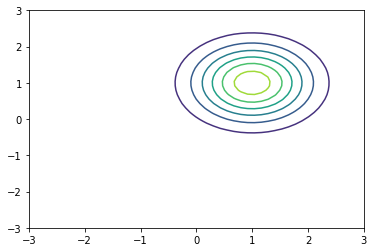

In [44]:
xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
xs, ys = np.meshgrid(xs, ys)

zs = np.exp(-(xs - 1)**2 - (ys - 1)**2)
plt.contour(xs, ys, zs);

#### Exercise

Plot 

$$ f(x,y) = x^2 - y^2$$

using a contour plot.

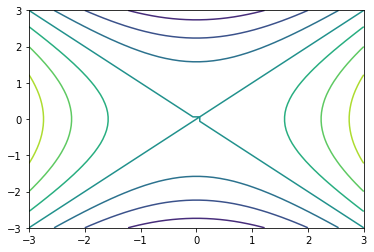

In [41]:
zs = xs ** 2 - ys **2
plt.contour(xs, ys, zs);

# Constrained optimization 

* Objective function
* Restrictions

## Linear programming

Objective function and constraints are all linear.

"Programming" here is used as "scheduling", not "computer programming".

#### Example

TODO: the gas-processing plant

## Nonlinear programming

* Indirect methods
* Direct methods: generalized gradient search

# Problems

#### Exercise

The trajectory of a ball can be computed with

$$y =(tan\theta_0)x - \frac{g}{2v_0^2cos^2\theta_0}x^2 + y_0$$

where $y$ = the height (m), $\theta_0$ = the initial angle (radians), $v_0$ = the initial velocity (m/s), $g$ = the gravitational constant $9.81 m/s^2$, and $y_0$ = the initial height (m). 

Use bisection search like we did in section 02 to find roots of equations, but this time to determine the maximum height given $y_0 = 1 m$, $v_0 = 25 m/s$ and $\theta_0= 50$. Iterate until the approximate error falls below $\epsilon_s = 1%$ using initial guesses of $x_l = 0$ and $x_u = 60 m$.

#### Exercise

Perform three iterations of the optimal gradient steepest descent method to locate the minimum of 

$$f(x, y) = −8x + x^2 + 12y + 4y^2 − 2x y$$

using initial guesses $x = 0$ and $y = 0$.

Plot the function and the steps you took.

#### Exercise

Given the following function,

$$f(x, y) = −8x + x^2 + 12y + 4y^2 − 2x y$$

use Python to determine the minimum:

* Graphically.
* Numerically.
* Substitute the result of (b) back into the function to determine the minimum $f (x, y)$.
* Determine the Hessian and its determinant, and substitute the result of part (b) back into the latter to verify that a minimum has been detected.

# Further reading

TODO